In [5]:
import os
import cv2
import time
import numpy as np
import shutil
from FaceDetectionModule import Face_Detector
from FaceLandmarksModule import Landmark_Extractor
import imutils
from imutils import face_utils
import dlib
import matplotlib.pyplot as plt


In [6]:
def euclidean_dist(ptA, ptB):
 # compute and return the euclidean distance between the two
 # points
    return np.linalg.norm(ptA - ptB)

In [7]:
device = "CPU"
cpu_extension_path = "cpu_extension_avx2.dll"
detection_thresh = 0.7
landmarks_file = "Models/shape_predictor_68_face_landmarks.dat"

In [8]:
model_xml = r"Models/openvino/face-detection/FP16/face-detection-retail-0004.xml"
model_bin = r"Models/openvino/face-detection/FP16/face-detection-retail-0004.bin"

plugin = Face_Detector.init_plugin(device,cpu_extension_path)

faceDetector = Face_Detector()

faceDetector.load_net(model_xml,model_bin,plugin)

INFO: All network layers are supported.
Input Shape: [1, 3, 300, 300]
Output Shape: [1, 1, 200, 7]


In [9]:
model_xml = r"Models/openvino/face-landmarks/FP16/facial-landmarks-35-adas-0002.xml"
model_bin = r"Models/openvino/face-landmarks/FP16/facial-landmarks-35-adas-0002.bin"

landmarkExtractor = Landmark_Extractor()

landmarkExtractor.load_net(model_xml,model_bin,plugin)

INFO: All network layers are supported.
Input Shape: [1, 3, 60, 60]
Output Shape: [1, 70]


In [10]:
predictor = dlib.shape_predictor(landmarks_file)

In [11]:
img = cv2.imread(r"C:\Users\ADNEC- VW 3\Notebooks\IMG_TEST\Osama.jpg")
img_orig = img.copy()
faces = faceDetector.detectFaces(img)[0]
for (x_min,y_min,x_max,y_max) in faces:
    cv2.rectangle(img,(x_min,y_min),(x_max,y_max),(255,255,0),2)
    #img = img[y_min:y_max,x_min:x_max]  
cv2.imshow("output",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img = img[y_min:y_max,x_min:x_max]
(x_min,y_min,x_max,y_max) = (0,0,img.shape[1],img.shape[0])
img = landmarkExtractor.prepare_face(img)

cv2.imshow("output",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
shape = predictor(img, dlib.rectangle(x_min,y_min,x_max,y_max))

r_eye_points= list(map(lambda p:(p.x,p.y), list(shape.parts()[42:48])))
l_eye_points = list(map(lambda p:(p.x,p.y), list(shape.parts()[36:42])))
print(r_eye_points) 
for p in r_eye_points:
    cv2.circle(img,p,2,(255,255,0),-1)
    
for p in l_eye_points:
    cv2.circle(img,p,2,(255,255,0),-1)

cv2.imshow("output",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[(117, 146), (129, 137), (141, 138), (151, 146), (141, 151), (129, 150)]


In [44]:
def extract_landmarks(img,return_img = False):
    faces = faceDetector.detectFaces(img)
    if faces is None or len(faces) == 0:
        return [],[]
    (x_min,y_min,x_max,y_max)= faces[0][0]
    
    img_crop = img[y_min:y_max,x_min:x_max]
    (x_min,y_min,x_max,y_max) = (0,0,img_crop.shape[1],img_crop.shape[0])
    img_crop = landmarkExtractor.prepare_face(img_crop)
    
    #img = img[y_min:y_max,x_min:x_max]  
    #img = imutils.resize(img,height = 300)
    #img = landmarkExtractor.prepare_face(img)
   # landmarks = landmarkExtractor.extractLandmarks(img)
    #landmarks = list(map(lambda x:(int(x[0]*img.shape[1]),int(x[1]*img.shape[0])),landmarks))
    #left_eye_landmarks = [landmarks[0],landmarks[1],landmarks[12],landmarks[14]]
    #right_eye_landmarks = [landmarks[2],landmarks[3],landmarks[17],landmarks[15]]
    shape = predictor(cv2.cvtColor(img_crop,cv2.COLOR_BGR2GRAY), dlib.rectangle(x_min,y_min,x_max,y_max))
    r_eye_points= list(map(lambda p:(p.x,p.y), list(shape.parts()[42:48])))
    l_eye_points = list(map(lambda p:(p.x,p.y), list(shape.parts()[36:42])))
    if return_img:
        return r_eye_points,l_eye_points,img_crop
    else:
        return r_eye_points,l_eye_points

In [14]:
def append(arr1,arr2):
    arr_result = arr1.copy()
    for element in arr2:
        arr_result.append(element)
    return arr_result

In [15]:
def eye_aspect_ratio(eye):
# compute the euclidean distances between the two sets of
 # vertical eye landmarks (x, y)-coordinates
    a = euclidean_dist(eye[1], eye[5])
    b = euclidean_dist(eye[2], eye[4])

 # compute the euclidean distance between the horizontal
 # eye landmark (x, y)-coordinates
    c = euclidean_dist(eye[0], eye[3])

 # compute the eye aspect ratio
    ear = (a + b) / (2.0 * c)

 # return the eye aspect ratio
    return ear

In [42]:
cap = cv2.VideoCapture(0)
cap_w = 1920
cap_h = 1080
cap.set(cv2.CAP_PROP_FRAME_WIDTH,cap_w)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,cap_h)

True

In [41]:
cap.release()
cv2.destroyAllWindows()

1.5367736692401464
1.671446128635805
Right Aspect Ratio: 1.967741935483871
Left Aspect Ratio: 1.8133333333333332


False

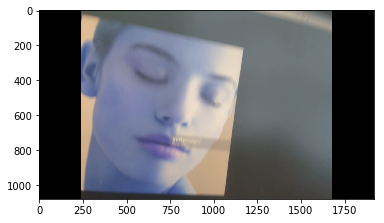

In [37]:
ret,img_orig =  cap.read()

plt.imshow(img_orig)

both_eyes_closed(img_orig)

In [57]:
#img_orig = cv2.imread(r"C:\Users\ADNEC- VW 3\Notebooks\IMG_TEST\closed2.jpg")
ret,img_orig =  cap.read()
img = img_orig.copy()

right_eye_landmarks,left_eye_landmarks,img = extract_landmarks(img,True)

right_eye_cnts = []
for lm in right_eye_landmarks:
    right_eye_cnts.append(list(lm))
right_eye_cnts = np.array(right_eye_cnts,dtype="int32")

left_eye_cnts = []
for rm in left_eye_landmarks:
    left_eye_cnts.append(list(rm))
left_eye_cnts = np.array(left_eye_cnts,dtype="int32")


r_ear = eye_aspect_ratio(right_eye_cnts)
l_ear = eye_aspect_ratio(left_eye_cnts)
ear = (r_ear + l_ear) / 2.0
print("Ear aspect ratio: {}".format(ear))

hull_r = cv2.convexHull(right_eye_cnts)
hull_l = cv2.convexHull(left_eye_cnts)
(x1,y1,w1,h1) = cv2.boundingRect(hull_r)
(x2,y2,w2,h2)  = cv2.boundingRect(hull_l)

cnt_r_area = w1*h1
cnt_l_area = w2*h2
hull_r_area = cv2.contourArea(hull_r)
hull_l_area = cv2.contourArea(hull_l)
solidity_r = cnt_r_area/hull_r_area
solidity_l = cnt_l_area/hull_l_area
r_ratio = w1/h1
l_ratio = w2/h2

print(solidity_r)
print(solidity_l)
print("Right Aspect Ratio: {}".format(r_ratio))
print("Left Aspect Ratio: {}".format(l_ratio))

temp = img.copy()

cv2.rectangle(temp,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)
cv2.rectangle(temp,(x2,y2),(x2+w2,y2+h2),(0,255,0),2)

temp = cv2.drawContours(temp,[hull_r,hull_l],-1,(255,255,0),3)
cv2.imshow("output",temp)
cv2.waitKey(0)
cv2.destroyAllWindows()

Ear aspect ratio: 0.2896643669446012
1.7294117647058824
1.8143009605122733
Right Aspect Ratio: 3.0
Left Aspect Ratio: 2.8333333333333335


In [60]:
hull_l

array([[[166, 299]],

       [[138, 311]],

       [[107, 315]],

       [[ 82, 308]],

       [[107, 291]],

       [[137, 286]]], dtype=int32)

In [31]:
def both_eyes_closed(img):
    
    try:
        right_eye_landmarks,left_eye_landmarks = extract_landmarks(img)
    except:
        return None
    
    if right_eye_landmarks == []:
        return None
  #  print(right_eye_landmarks[1][1] - right_eye_landmarks[5][1])
    right_eye_cnts = []
    for lm in right_eye_landmarks:
        right_eye_cnts.append(list(lm))
    right_eye_cnts = np.array(right_eye_cnts,dtype="int32")

    left_eye_cnts = []
    for rm in left_eye_landmarks:
        left_eye_cnts.append(list(rm))
    left_eye_cnts = np.array(left_eye_cnts,dtype="int32")

    hull_r = cv2.convexHull(right_eye_cnts)
    hull_l = cv2.convexHull(left_eye_cnts)
    (x1,y1,w1,h1) = cv2.boundingRect(hull_r)
    (x2,y2,w2,h2)  = cv2.boundingRect(hull_l)

    cnt_r_area = w1*h1
    cnt_l_area = w2*h2
    hull_r_area = cv2.contourArea(hull_r)
    hull_l_area = cv2.contourArea(hull_l)
    solidity_r = cnt_r_area/hull_r_area
    solidity_l = cnt_l_area/hull_l_area
    r_ratio = w1/h1
    l_ratio = w2/h2
    
    
    print(solidity_r)
    print(solidity_l)
    print("Right Aspect Ratio: {}".format(r_ratio))
    print("Left Aspect Ratio: {}".format(l_ratio))
    
    if solidity_r>2.3 and solidity_l>2.3:
        return True
    
    if r_ratio>4 and l_ratio>4:
        return True
    return False

import glob
import matplotlib.pyplot as plt
for img_path in glob.glob("/home/pi/Notebooks/FaceRecognitionFramework/Images_/query/*.*"):
    img = cv2.imread(img_path)
    if img is None:
        continue
    closed = both_eyes_closed(img)
    cv2.imshow(str(closed),img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [30]:
cap = cv2.VideoCapture(0)
cap_w = 800
cap_h = 600
cap.set(cv2.CAP_PROP_FRAME_WIDTH,cap_w)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,cap_h)
drowsiness_alert_frames = 10
drowsiness_count =0

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == False:
        continue
    
    closed = both_eyes_closed(frame)
    if closed == True:
        #print("closed")
        drowsiness_count = min(drowsiness_alert_frames + (drowsiness_alert_frames*0.5),
                            drowsiness_count+1)
        cv2.putText(frame,"Eyes Closed",(100,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,0),1)
    elif closed == False:
        drowsiness_count = max(0,drowsiness_count-1)
        cv2.putText(frame,"Eyes Open",(100,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,0),1)
    #print(drowsiness_count)   
    if drowsiness_count>=drowsiness_alert_frames:
        print("Alert")
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cap.release()
cv2.destroyAllWindows()

1.5834767641996557
1.6923076923076923
Right Aspect Ratio: 2.3
Left Aspect Ratio: 2.0454545454545454
1.657387580299786
1.812807881773399
Right Aspect Ratio: 2.388888888888889
Left Aspect Ratio: 2.3
1.5720430107526882
1.718279569892473
Right Aspect Ratio: 2.5294117647058822
Left Aspect Ratio: 2.764705882352941
1.7524339360222532
1.6336499321573947
Right Aspect Ratio: 2.8
Left Aspect Ratio: 3.0714285714285716
1.76231884057971
1.6774193548387097
Right Aspect Ratio: 2.375
Left Aspect Ratio: 2.7857142857142856
1.661807580174927
1.6677115987460815
Right Aspect Ratio: 2.533333333333333
Left Aspect Ratio: 2.7142857142857144
1.6286107290233838
1.7381615598885793
Right Aspect Ratio: 2.3125
Left Aspect Ratio: 2.4375
1.7845303867403315
1.625
Right Aspect Ratio: 2.235294117647059
Left Aspect Ratio: 2.7857142857142856
1.669242658423493
1.7076923076923076
Right Aspect Ratio: 2.4
Left Aspect Ratio: 2.466666666666667
1.6742081447963801
1.7298937784522004
Right Aspect Ratio: 2.466666666666667
Left Aspect

1.7413572343149808
1.741654571843251
Right Aspect Ratio: 2.3529411764705883
Left Aspect Ratio: 2.6666666666666665
1.8481848184818481
1.6984924623115578
Right Aspect Ratio: 2.857142857142857
Left Aspect Ratio: 3.0
1.691326530612245
1.693121693121693
Right Aspect Ratio: 2.2941176470588234
Left Aspect Ratio: 2.5
1.66883963494133
1.7066666666666668
Right Aspect Ratio: 2.5
Left Aspect Ratio: 2.5
1.6690442225392297
1.7231222385861562
Right Aspect Ratio: 2.6
Left Aspect Ratio: 2.6
1.6842105263157894
1.773142112125163
Right Aspect Ratio: 2.4375
Left Aspect Ratio: 2.3529411764705883
1.9293286219081272
1.7727272727272727
Right Aspect Ratio: 2.7857142857142856
Left Aspect Ratio: 3.0
1.7213793103448276
1.7307692307692308
Right Aspect Ratio: 2.4375
Left Aspect Ratio: 2.6
1.7391304347826086
1.725067385444744
Right Aspect Ratio: 2.3529411764705883
Left Aspect Ratio: 2.5
1.6347381864623245
1.6790123456790123
Right Aspect Ratio: 2.5
Left Aspect Ratio: 2.3529411764705883
1.7142857142857142
1.74165457184

2.01025641025641
1.985267034990792
Right Aspect Ratio: 4.083333333333333
Left Aspect Ratio: 4.454545454545454
1.7418147801683816
1.6381514257620453
Right Aspect Ratio: 2.5789473684210527
Left Aspect Ratio: 2.8823529411764706
1.6603773584905661
1.719941348973607
Right Aspect Ratio: 2.272727272727273
Left Aspect Ratio: 2.217391304347826
1.728813559322034
1.8299120234604105
Right Aspect Ratio: 2.8333333333333335
Left Aspect Ratio: 2.888888888888889
1.6354538956397426
1.6422535211267606
Right Aspect Ratio: 2.3636363636363638
Left Aspect Ratio: 2.409090909090909
1.7013888888888888
1.6622922134733158
Right Aspect Ratio: 2.45
Left Aspect Ratio: 2.6315789473684212
1.68
1.575609756097561
Right Aspect Ratio: 2.4285714285714284
Left Aspect Ratio: 2.6842105263157894
1.702127659574468
1.642512077294686
Right Aspect Ratio: 2.6
Left Aspect Ratio: 2.55
1.8537590113285274
1.7997750281214848
Right Aspect Ratio: 2.7777777777777777
Left Aspect Ratio: 3.125
1.8036072144288577
1.7142857142857142
Right Aspec

In [ ]:
cap.release()
cv2.destroyAllWindows()